# Solution sketch, lab 12

# 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

pd.set_option('max_columns', None)

In [18]:
colNames = ["CHAIN",   "CO_OWNED","STATE",  "SOUTHJ", "CENTRALJ","NORTHJ", "PA1",    "PA2",    "SHORE",   "NCALLS",  "EMPFT",   "EMPPT",   "NMGRS",   "WAGE_ST", "INCTIME", "FIRSTINC","BONUS",   "PCTAFF",  "MEALS",   "OPEN",    "HRSOPEN", "PSODA",   "PFRY",    "PENTREE", "NREGS",   "NREGS11", "TYPE2",   "STATUS2", "DATE2",   "NCALLS2", "EMPFT2",  "EMPPT2",  "NMGRS2",  "WAGE_ST2","INCTIME2","FIRSTIN2","SPECIAL2","MEALS2",  "OPEN2R",  "HRSOPEN2","PSODA2",  "PFRY2",   "PENTREE2","NREGS2",  "NREGS112"]
minWageDF = pd.read_table("minWage.dat", sep="\s+", names=colNames)
minWageDF

,CHAIN,CO_OWNED,STATE,SOUTHJ,CENTRALJ,NORTHJ,PA1,PA2,SHORE,NCALLS,...,FIRSTIN2,SPECIAL2,MEALS2,OPEN2R,HRSOPEN2,PSODA2,PFRY2,PENTREE2,NREGS2,NREGS112
46,1,0,0,0,0,0,1,0,0,0,...,0.08,1,2,6.50,16.50,1.03,.,0.94,4,4
49,2,0,0,0,0,0,1,0,0,0,...,0.05,0,2,10.00,13.00,1.01,0.89,2.35,4,4
506,2,1,0,0,0,0,1,0,0,0,...,0.25,.,1,11.00,11.00,0.95,0.74,2.33,4,3
56,4,1,0,0,0,0,1,0,0,0,...,0.15,0,2,10.00,12.00,0.92,0.79,0.87,2,2
61,4,1,0,0,0,0,1,0,0,0,...,0.15,0,2,10.00,12.00,1.01,0.84,0.95,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,2,1,1,0,0,1,0,0,0,3,...,0.50,0,1,11.00,11.00,1.05,0.84,2.32,3,2
424,2,1,1,0,0,1,0,0,0,0,...,0.50,0,1,11.00,14.00,1.05,0.94,2.32,5,3
426,3,1,1,0,0,1,0,0,0,0,...,0.25,1,2,6.00,18.00,1.11,1.05,1.05,6,5
427,4,0,1,0,0,1,0,0,0,3,...,.,1,2,10.50,12.50,1.11,1.09,2.07,2,2


In [19]:
minWage.columns

Index(['CHAIN', 'CO_OWNED', 'STATE', 'SOUTHJ', 'CENTRALJ', 'NORTHJ', 'PA1',
       'PA2', 'SHORE', 'NCALLS', 'EMPFT', 'EMPPT', 'NMGRS', 'WAGE_ST',
       'INCTIME', 'FIRSTINC', 'BONUS', 'PCTAFF', 'MEALS', 'OPEN', 'HRSOPEN',
       'PSODA', 'PFRY', 'PENTREE', 'NREGS', 'NREGS11', 'TYPE2', 'STATUS2',
       'DATE2', 'NCALLS2', 'EMPFT2', 'EMPPT2', 'NMGRS2', 'WAGE_ST2',
       'INCTIME2', 'FIRSTIN2', 'SPECIAL2', 'MEALS2', 'OPEN2R', 'HRSOPEN2',
       'PSODA2', 'PFRY2', 'PENTREE2', 'NREGS2', 'NREGS112'],
      dtype='object')

In [59]:
minWage1 = minWage.loc[:, ['CHAIN', 'CO_OWNED', 'STATE', 'SOUTHJ', 'CENTRALJ', 'NORTHJ', 'PA1',
       'PA2', 'SHORE', 'NCALLS', 'EMPFT', 'EMPPT', 'NMGRS', 'WAGE_ST',
       'INCTIME', 'FIRSTINC', 'BONUS', 'PCTAFF', 'MEALS', 'OPEN', 'HRSOPEN',
       'PSODA', 'PFRY', 'PENTREE', 'NREGS', 'NREGS11']]


minWage2 = minWage.loc[:, ['CHAIN', 'CO_OWNED', 'STATE', 'SOUTHJ', 'CENTRALJ', 'NORTHJ', 'PA1',
       'PA2', 'SHORE','NCALLS2', 'EMPFT2', 'EMPPT2', 'NMGRS2', 'WAGE_ST2',
       'INCTIME2', 'FIRSTIN2', 'BONUS', 'PCTAFF', 'MEALS2', 'OPEN2R', 'HRSOPEN2',
       'PSODA2', 'PFRY2', 'PENTREE2', 'NREGS2', 'NREGS112']]

In [60]:
minWage2.columns

Index(['CHAIN', 'CO_OWNED', 'STATE', 'SOUTHJ', 'CENTRALJ', 'NORTHJ', 'PA1',
       'PA2', 'SHORE', 'NCALLS2', 'EMPFT2', 'EMPPT2', 'NMGRS2', 'WAGE_ST2',
       'INCTIME2', 'FIRSTIN2', 'BONUS', 'PCTAFF', 'MEALS2', 'OPEN2R',
       'HRSOPEN2', 'PSODA2', 'PFRY2', 'PENTREE2', 'NREGS2', 'NREGS112'],
      dtype='object')

In [61]:
#indicator variable for before or after implimentation
minWage1["afterImplim"] = 0
minWage2["afterImplim"] = 1

#rename columns so consistent with minWage1
minWage2.columns = ['CHAIN', 'CO_OWNED', 'STATE', 'SOUTHJ', 'CENTRALJ', 'NORTHJ', 'PA1',
       'PA2', 'SHORE', 'NCALLS', 'EMPFT', 'EMPPT', 'NMGRS', 'WAGE_ST',
       'INCTIME', 'FIRSTINC','BONUS', 'PCTAFF', 'MEALS', 'OPEN', 'HRSOPEN',
       'PSODA', 'PFRY', 'PENTREE', 'NREGS', 'NREGS11', 'afterImplim']

In [62]:
minWage_long = pd.concat([minWage1, minWage2])
minWage_long

,CHAIN,CO_OWNED,STATE,SOUTHJ,CENTRALJ,NORTHJ,PA1,PA2,SHORE,NCALLS,EMPFT,EMPPT,NMGRS,WAGE_ST,INCTIME,FIRSTINC,BONUS,PCTAFF,MEALS,OPEN,HRSOPEN,PSODA,PFRY,PENTREE,NREGS,NREGS11,afterImplim
46,1,0,0,0,0,0,1,0,0,0,30.00,15.00,3.00,.,19.0,.,1,.,2,6.5,16.5,1.03,1.03,0.52,3,3,0
49,2,0,0,0,0,0,1,0,0,0,6.50,6.50,4.00,.,26.0,.,0,.,2,10.0,13.0,1.01,0.90,2.35,4,3,0
506,2,1,0,0,0,0,1,0,0,0,3.00,7.00,2.00,.,13.0,0.37,0,30.0,2,11.0,10.0,0.95,0.74,2.33,3,3,0
56,4,1,0,0,0,0,1,0,0,0,20.00,20.00,4.00,5.00,26.0,0.10,1,0.0,2,10.0,12.0,0.87,0.82,1.79,2,2,0
61,4,1,0,0,0,0,1,0,0,0,6.00,26.00,5.00,5.50,52.0,0.15,1,0.0,3,10.0,12.0,0.87,0.77,1.65,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,2,1,1,0,0,1,0,0,0,1,19.00,3.50,3.00,5.25,13.0,0.50,1,33.0,1,11.00,11.00,1.05,0.84,2.32,3,2,1
424,2,1,1,0,0,1,0,0,0,1,12.00,3.00,4.00,5.25,19.0,0.50,0,45.0,1,11.00,14.00,1.05,0.94,2.32,5,3,1
426,3,1,1,0,0,1,0,0,0,.,5.00,25.00,3.00,5.05,19.0,0.25,0,75.0,2,6.00,18.00,1.11,1.05,1.05,6,5,1
427,4,0,1,0,0,1,0,0,0,4,0.00,35.00,3.00,5.05,.,.,0,40.0,2,10.50,12.50,1.11,1.09,2.07,2,2,1


In [71]:
minWage_long.dtypes

CHAIN            int64
CO_OWNED         int64
STATE            int64
SOUTHJ           int64
CENTRALJ         int64
NORTHJ           int64
PA1              int64
PA2              int64
SHORE            int64
NCALLS          object
EMPFT          float64
EMPPT           object
NMGRS           object
WAGE_ST         object
INCTIME         object
FIRSTINC        object
BONUS            int64
PCTAFF          object
MEALS           object
OPEN            object
HRSOPEN         object
PSODA           object
PFRY            object
PENTREE         object
NREGS           object
NREGS11         object
afterImplim      int64
dtype: object

In [75]:
minWage_long["EMPFT"] = pd.to_numeric(minWage_long.EMPFT, errors='coerce')
minWage_long["EMPPT"] = pd.to_numeric(minWage_long.EMPPT, errors='coerce')
minWage_long["NMGRS"] = pd.to_numeric(minWage_long.NMGRS , errors='coerce')
minWage_long["WAGE_ST"] = pd.to_numeric(minWage_long.WAGE_ST, errors='coerce')
minWage_long["INCTIME"] = pd.to_numeric(minWage_long.INCTIME, errors='coerce')



In [76]:
minWage_long

,CHAIN,CO_OWNED,STATE,SOUTHJ,CENTRALJ,NORTHJ,PA1,PA2,SHORE,NCALLS,EMPFT,EMPPT,NMGRS,WAGE_ST,INCTIME,FIRSTINC,BONUS,PCTAFF,MEALS,OPEN,HRSOPEN,PSODA,PFRY,PENTREE,NREGS,NREGS11,afterImplim
46,1,0,0,0,0,0,1,0,0,0,30.0,15.0,3.0,NaN,19.0,.,1,.,2,6.5,16.5,1.03,1.03,0.52,3,3,0
49,2,0,0,0,0,0,1,0,0,0,6.5,6.5,4.0,NaN,26.0,.,0,.,2,10.0,13.0,1.01,0.90,2.35,4,3,0
506,2,1,0,0,0,0,1,0,0,0,3.0,7.0,2.0,NaN,13.0,0.37,0,30.0,2,11.0,10.0,0.95,0.74,2.33,3,3,0
56,4,1,0,0,0,0,1,0,0,0,20.0,20.0,4.0,5.00,26.0,0.10,1,0.0,2,10.0,12.0,0.87,0.82,1.79,2,2,0
61,4,1,0,0,0,0,1,0,0,0,6.0,26.0,5.0,5.50,52.0,0.15,1,0.0,3,10.0,12.0,0.87,0.77,1.65,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,2,1,1,0,0,1,0,0,0,1,19.0,3.5,3.0,5.25,13.0,0.50,1,33.0,1,11.00,11.00,1.05,0.84,2.32,3,2,1
424,2,1,1,0,0,1,0,0,0,1,12.0,3.0,4.0,5.25,19.0,0.50,0,45.0,1,11.00,14.00,1.05,0.94,2.32,5,3,1
426,3,1,1,0,0,1,0,0,0,.,5.0,25.0,3.0,5.05,19.0,0.25,0,75.0,2,6.00,18.00,1.11,1.05,1.05,6,5,1
427,4,0,1,0,0,1,0,0,0,4,0.0,35.0,3.0,5.05,NaN,.,0,40.0,2,10.50,12.50,1.11,1.09,2.07,2,2,1


In [77]:
minWage_long["EMP"] = minWage_long["EMPFT"] + .5*minWage_long["EMPPT"] #Part-time employee is counted as 50% of a full-time employee

Now we start the first naive regression where we only use the post-implimentation data

In [83]:
wageReg1 = smf.glm("EMP~STATE", data=minWage_long.loc[minWage_long.afterImplim==1,:]).fit()


In [84]:
wageReg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    EMP   No. Observations:                  397
Model:                            GLM   Df Residuals:                      395
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          74.274
Method:                          IRLS   Log-Likelihood:                -1417.4
Date:                Wed, 24 Aug 2022   Deviance:                       29338.
Time:                        10:50:39   Pearson chi2:                 2.93e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.5422      0.982     17.861      0.000      15.617      19.467
STATE          0.0304      1.094      0.028      0.978      -2.114       2.175
==============================================================================
"""

This indicates that employment was higher in New Jersey fast food restaurants compared to Pennsylvania after the implimentation of the higher minimum wage. But this is quite weak evidence. 

- We are interested in the change in employment with the new law, so we coud instead take a regression of New Jersey data

In [87]:
wageReg2 = smf.glm("EMP~afterImplim", data=minWage_long.loc[minWage_long.STATE==1,:]).fit()

wageReg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    EMP   No. Observations:                  646
Model:                            GLM   Df Residuals:                      644
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          76.618
Method:                          IRLS   Log-Likelihood:                -2317.1
Date:                Wed, 24 Aug 2022   Deviance:                       49342.
Time:                        10:57:18   Pearson chi2:                 4.93e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      17.0652      0.485     35.201      0.000      16.115      18.015
afterImplim     0.5075      0.689      0.737      0.461      -0.843       1.858
===============================================================================
"""

We still seem to have evidence of growing employment, but it would still be hard to interpret this as causal. Perhaps the national economy was strong and the trend in employment for all states was increasing. What we need is a comparison to a type of controll group which experiences the same national trends, but not the rise in the minimum wage - in this case western Pennsylvania. 

So let's first do this with a simple comparison of means: 

2.9231916072606405
1.7514561889176437


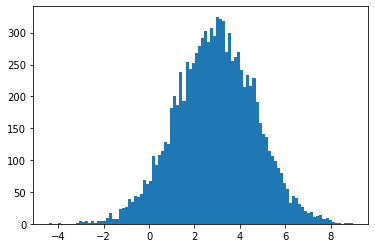

In [104]:


NJpre_mean = minWage_long.EMP[(minWage_long.STATE==1) & (minWage_long.afterImplim==0)].mean()
NJpost_mean = minWage_long.EMP[(minWage_long.STATE==1) & (minWage_long.afterImplim==1)].mean()
PApre_mean = minWage_long.EMP[(minWage_long.STATE==0) & (minWage_long.afterImplim==0)].mean()
PApost_mean = minWage_long.EMP[(minWage_long.STATE==0) & (minWage_long.afterImplim==1)].mean()

NJpre_var = minWage_long.EMP[(minWage_long.STATE==1) & (minWage_long.afterImplim==0)].var()
NJpost_var = minWage_long.EMP[(minWage_long.STATE==1) & (minWage_long.afterImplim==1)].var()
PApre_var = minWage_long.EMP[(minWage_long.STATE==0) & (minWage_long.afterImplim==0)].var()
PApost_var = minWage_long.EMP[(minWage_long.STATE==0) & (minWage_long.afterImplim==1)].var()

NJpre_size = minWage_long.EMP[(minWage_long.STATE==1) & (minWage_long.afterImplim==0)].count()
NJpost_size = minWage_long.EMP[(minWage_long.STATE==1) & (minWage_long.afterImplim==1)].count()
PApre_size = minWage_long.EMP[(minWage_long.STATE==0) & (minWage_long.afterImplim==0)].count()
PApost_size = minWage_long.EMP[(minWage_long.STATE==0) & (minWage_long.afterImplim==1)].count()

#We'll use our simulation based approach to inference

NJpre_sim = np.random.normal(NJpre_mean, np.sqrt(NJpre_var/(NJpre_size-1)),10000)
NJpost_sim = np.random.normal(NJpost_mean, np.sqrt(NJpost_var/(NJpost_size-1)),10000)
PApre_sim = np.random.normal(PApre_mean, np.sqrt(PApre_var/(PApre_size-1)),10000)
PApost_sim = np.random.normal(PApost_mean, np.sqrt(PApost_var/(PApost_size-1)),10000)

DinD_est = (NJpost_sim - NJpre_sim) - (PApost_sim - PApre_sim)

plt.hist(DinD_est, bins=100)

print(DinD_est.mean())
print(DinD_est.std())

In [105]:
#Compare this to using regression - we notice that the interaction term is close to our manually calculated mean 
#and standard deviation



In [106]:
wageReg3 = smf.glm("EMP~STATE*afterImplim", data=minWage_long).fit()
wageReg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    EMP   No. Observations:                  801
Model:                            GLM   Df Residuals:                      797
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          81.055
Method:                          IRLS   Log-Likelihood:                -2894.8
Date:                Wed, 24 Aug 2022   Deviance:                       64601.
Time:                        11:30:02   Pearson chi2:                 6.46e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.9487      1.019     19.569      0.000      17.951      21.947
STATE                -2.8835      1.135     -2.541      0.011      -5.108      -0.659
afterImplim          -2.4065      1.446     -1.664      0.096      -5.241       0.428
STATE:afterImplim     2.9140      1.611      1.809      0.070      -0.243       6.071
=====================================================================================
"""

You can notice that by including other explanatory variables you can refine the estimate as well as making the estimates more precise (lower standard error)

## 2

## 2. Instrumental variables: simulating (optional)

(Based on ROS Exercise 21.2 and 21.3, p.450-451)


The goal of this exercise is to simulate data consistent with the assumptions of the instrumental variables procedure described in Section 21.1.You will also evaluate the properties of different approaches to estimating the complier average causal effect (CACE).

Consider a hypothetical randomized encouragement design. In particular, imagine a study in which 1000 students entering any undergraduate degree program in Business in a major university are randomly assigned to one of two conditions. 

One group is encouraged via an email from the chair of their department to participate in a one-week math boot camp just before the start of their first semester. Students in the other group are also allowed to participate but receive no special encouragement. These students would have had to discover on their own the existence of the program on the university website.

The running variable is test score on the final exam for a required math course, and the outcome variable 𝑦 that you will simulate below represents the difference between that score and the threshold for passing. Thus a negative value for a student reflects the fact that the student would not be eligible for that course. Below we will generate data for a sample of 1000 individuals.

(a) We will simulate compliance status. We assume that 25% of individuals are compliers who will take the math bootcamp if they receive an email, but otherwise will not. 60% are never-takers who will never take the math bootcamp no matter if they receive the email and 15% are always-takers, who will always take the bootcamp. 

We generate 𝑑0 and 𝑑1 vectors to reflect this. We also generate a vector indicating compliance type, 𝑐.


(b) We simulate the potential outcomes in a way that meets the following criteria: 

- The average effect of 𝑧 on 𝑦 for the compliers is 4.

- The average 𝑦(𝑧 = 0) for never-takers is 0; the average 𝑦(𝑧 = 0) for compliers is 3;  - The average 𝑦(𝑧 = 0) for always-takers is 6.

- The residual standard deviation is 1 for everyone in the sample (generated independently for each potential outcome).

(c) We put 𝑇0, 𝑇1, 𝑦0, 𝑦1 into one dataset called IV_df. You can also include a variable, 𝑐, indicating compliance group if you created one. We then also create the observed variables, y (actual test scores), T (whether a student went to the math boot camp) and z (whether they were randomly picked to receive an email encouragement).


In [159]:
#a.)
#compliance 
# 0 complier, 1 never takers, 2 always takers
c = np.array(np.concatenate([["Complier"]*250, ["Never Taker"]*600, ["Always Taker"]*150]))
d0 = np.array(np.concatenate([[0]*850, [1]*150])) #dummy for always takers
d1 = np.array(np.concatenate([[1]*250, [0]*750])) #dummy for complier



In [160]:
#z is the encouragement
z=np.array(np.concatenate([np.zeros(500), np.ones(500)]))

In [132]:
?np.random.shuffle

In [111]:
#Potential attendance outcomes

# Would attend if not encouraged
T_i0 = d0

# Would attend if encouraged
T_i1 = d0+d1


In [112]:
#Potential test outcomes

#test score given that they were encouraged to take test. 

y0_complier = np.random.normal(3,1,250)
y0_neverTaker = np.random.normal(0,1,600) # y(z=0)
y0_alwaysTaker = np.random.normal(6,1,150)


y0 = np.concatenate([y0_complier, y0_neverTaker, y0_alwaysTaker])

complierEffect = np.random.normal(4,1,1000)

#out come

y1 = y0 + d1*complierEffect

In [113]:
IV_df = pd.DataFrame({
    "complierStatus":c, 
    "z":z,
    "d0":d0,
    "d1":d1,
    "T0":T_i0,
    "T1":T_i1,
    "y0": y0,
    "y1": y1
})

In [114]:
IV_df["encourEffect"] = y1-y0

In [115]:
IV_df

,complierStatus,z,d0,d1,T0,T1,y0,y1,encourEffect
0,Complier,0.0,0,1,0,1,2.086324,6.726564,4.640240
1,Complier,1.0,0,1,0,1,4.144089,8.690408,4.546319
2,Complier,1.0,0,1,0,1,2.420523,7.015841,4.595318
3,Complier,1.0,0,1,0,1,4.135378,9.454198,5.318820
4,Complier,0.0,0,1,0,1,3.350067,6.480476,3.130409
...,...,...,...,...,...,...,...,...,...
995,Always Taker,0.0,1,0,1,1,4.369031,4.369031,0.000000
996,Always Taker,0.0,1,0,1,1,4.518582,4.518582,0.000000
997,Always Taker,0.0,1,0,1,1,5.508385,5.508385,0.000000
998,Always Taker,1.0,1,0,1,1,7.348870,7.348870,0.000000


In [116]:
IV_df.groupby("complierStatus")["encourEffect"].aggregate(np.mean)

complierStatus
Always Taker    0.000000
Complier        3.978516
Never Taker     0.000000
Name: encourEffect, dtype: float64

In [117]:
#actual attendance outcome
IV_df["T"] = d1*z + d0

In [118]:
IV_df

,complierStatus,z,d0,d1,T0,T1,y0,y1,encourEffect,T
0,Complier,0.0,0,1,0,1,2.086324,6.726564,4.640240,0.0
1,Complier,1.0,0,1,0,1,4.144089,8.690408,4.546319,1.0
2,Complier,1.0,0,1,0,1,2.420523,7.015841,4.595318,1.0
3,Complier,1.0,0,1,0,1,4.135378,9.454198,5.318820,1.0
4,Complier,0.0,0,1,0,1,3.350067,6.480476,3.130409,0.0
...,...,...,...,...,...,...,...,...,...,...
995,Always Taker,0.0,1,0,1,1,4.369031,4.369031,0.000000,1.0
996,Always Taker,0.0,1,0,1,1,4.518582,4.518582,0.000000,1.0
997,Always Taker,0.0,1,0,1,1,5.508385,5.508385,0.000000,1.0
998,Always Taker,1.0,1,0,1,1,7.348870,7.348870,0.000000,1.0


In [119]:
IV_df["y"] = y0*(1-z) + y1*(z)

Now that we have created our data set let's consider the perspective of the analyst. They clearly do not get to see the counterfactuals (y0, y1, T0,T1), they only get to see whether a student attended (T), the score on the test (y) and whether they were randomly part of the group that was encouraged (z).

a.) Start with a naive regression of T on y ($y_i = \alpha + beta T_i + \epsilon$). What are the results. Are the results biased? explain

b.) Use 2-stage least squares/Instrumental variables to estimate the effect of T on Y

(You might want to see the [two stage least squares estimation tool](https://www.statsmodels.org/dev/generated/statsmodels.sandbox.regression.gmm.IV2SLS.html) in statsmodels)

c.) Discuss why instrumental variables worked in this case / the assumptions necessary for IV to work. 

In [120]:
naiveMod = smf.glm("y~T", data=IV_df).fit()

In [133]:
naiveMod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          2.1124
Method:                          IRLS   Log-Likelihood:                -1791.8
Date:                Fri, 26 Aug 2022   Deviance:                       2108.1
Time:                        11:52:56   Pearson chi2:                 2.11e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4764      0.054      8.795      0.000       0.370       0.583
T              5.9440      0.102     58.069      0.000       5.743       6.145
==============================================================================
"""

This indicatest that the effect of attendance is an improvement in score of 5.87 +/- 2*.106. But we know that this is wrong, since we created the data in order to have an effect on average equal to 4. 

So we could say that this regression is biased upward. And it is biased because there is a missing unobserved variable that effects both T and Y. Namely, we can say that the **type** of person is unobserved. The researcher does not know who is a complier, never taker and always-taker. 

But what we do have is an **instrument** z (the email that was sent out), which we know (by construction) effects T (our explanatory variable), but does not (directly) affect our outcome variable, y. We can then do a two-stage **instrumental variable**. 

In the first stage, we take a regression of the instrument on the explanatory variable

In [141]:
stage1 = smf.ols("T~z", data=IV_df).fit()
stage1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     74.04
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           2.93e-17
Time:                        11:53:40   Log-Likelihood:                -582.42
No. Observations:                1000   AIC:                             1169.
Df Residuals:                     998   BIC:                             1179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1620      0.019      8.353      0.000       0.124       0.200
z              0.2360      0.027      8.605      0.000       0.182       0.290
==============================================================================
Omnibus:                      227.354   Durbin-Watson:                   0.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.536
Skew:                           0.865   Prob(JB):                     3.75e-35
Kurtosis:                       2.099   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

then we extract the fitted values of this, which we will call T_hat: 

In [142]:
IV_df["T_hat"] = stage1.fittedvalues


So now, T_hat, represents the T values that are explained by z (which is not related to the variable z). So then we can do our second stage regression

In [143]:
stage2 = smf.ols("y~T_hat", IV_df).fit()

In [144]:
stage2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     19.45
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           1.15e-05
Time:                        11:53:43   Log-Likelihood:                -2520.6
No. Observations:                1000   AIC:                             5045.
Df Residuals:                     998   BIC:                             5055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1440      0.245      4.664      0.000       0.663       1.625
T_hat          3.5598      0.807      4.410      0.000       1.976       5.144
==============================================================================
Omnibus:                      173.453   Durbin-Watson:                   0.439
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.212
Skew:                           0.575   Prob(JB):                     7.00e-20
Kurtosis:                       2.109   Cond. No.                         9.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we see we get an estimate of 3.9 +/- 2*0.694, which includes our "true value". The standard error is wrong however, since it only takes into account the second stage regression. The fitted values (T_hat) are also estimates with uncertainty, so this should also be included in the standard errors. You can do this manually (ROS 429), but it can be nice to just use an existing routine. 

In [145]:
import statsmodels.sandbox.regression.gmm as smGMM

With this procedure we need to add a constant term manually: 

In [148]:
IV_df["intercept"] = 1

In [157]:
IVmod = smGMM.IV2SLS(IV_df["y"], IV_df[["intercept","T"]], instrument=IV_df[["intercept","z"]]).fit()

In [158]:
IVmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          IV2SLS Regression Results                           
==============================================================================
Dep. Variable:                      y   R-squared:                       0.647
Model:                         IV2SLS   Adj. R-squared:                  0.647
Method:                     Two Stage   F-statistic:                     54.12
                        Least Squares   Prob (F-statistic):           3.94e-13
Date:                Fri, 26 Aug 2022                                         
Time:                        11:58:29                                         
No. Observations:                1000                                         
Df Residuals:                     998                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1440      0.147      7.780      0.000       0.855       1.432
T              3.5598      0.484      7.356      0.000       2.610       4.509
==============================================================================
Omnibus:                       39.812   Durbin-Watson:                   0.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.419
Skew:                           0.435   Prob(JB):                     4.54e-09
Kurtosis:                       2.593   Cond. No.                         2.44
==============================================================================
"""